<a href="https://colab.research.google.com/github/Krshnna/Exploratory-Data-Analysis/blob/main/EDA_on_Movie_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/movie.csv')
df.shape

(9125, 3)

In [ ]:
df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating = pd.read_csv('/content/ratings.csv')

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df = pd.merge(df, rating, on = "movieId", how = 'inner')

In [ ]:
df = df.drop(['movieId', 'userId', 'timestamp'], axis = 1)
df.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [ ]:
df = pd.pivot_table(df, index = ['title', 'genres'], aggfunc = 'mean')
df.reset_index(level = ['title', 'genres'], inplace = True)
df.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


<ipython-input-105-71d17f193a42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'], color = 'black')


<Axes: xlabel='rating', ylabel='Density'>

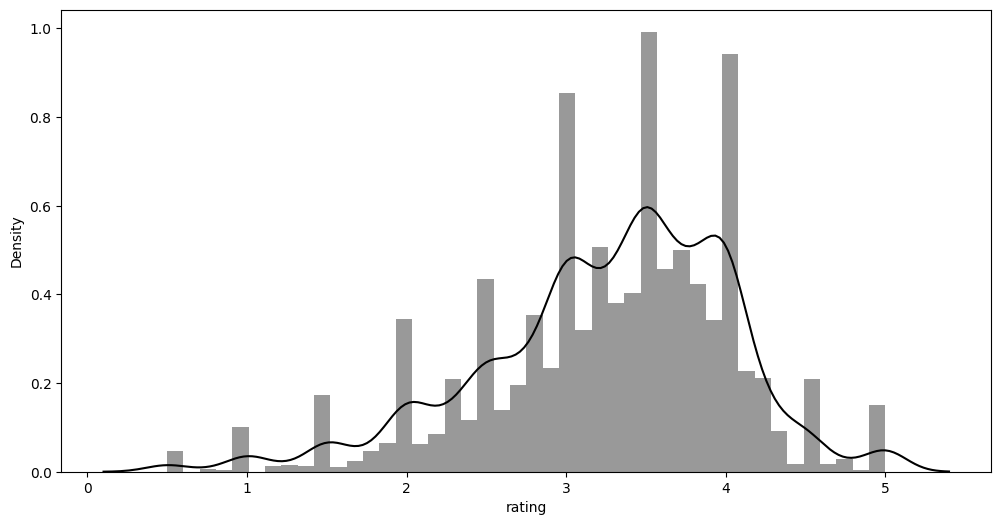

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(df['rating'], color = 'black')

In [ ]:
#extract the year of the release from the movie title
df['y'] = df['title'].str.split(' ')
df['year'] = df['y'].apply(lambda x : x[-1])
df = df.drop(['y'], axis = 1)
df['year'] = df['year'].str.strip('(')
df['year'] = df['year'].str.strip(')')
pd.set_option('display.max_rows', 110)
df['year'].value_counts()

In [ ]:
df['year'] = df['year'].replace(('Road', ''), (2002, 1996))
df['year'] = df['year'].astype(int)
df.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [ ]:
# now let's remove the year from movie title 
df['title'] = df['title'].str.split(' ')
df['title'] = df['title'].apply(lambda x : ' '.join(x[: -1])) # except for the last character i.e. year, everything will be appeneded

In [ ]:
df.sample(10)

,title,genres,rating,year
1497,"Cruise, The",Documentary,4.250000,1998
397,Any Given Sunday,Drama,3.000000,1999
1503,Cry_Wolf (a.k.a. Cry Wolf),Drama|Horror|Mystery|Thriller,2.250000,2005
6994,Wyatt Earp,Western,3.095238,1994
5419,Saw IV,Crime|Horror|Thriller,3.200000,2007
5589,Sherlock Jr.,Comedy|Fantasy|Romance,3.000000,1924
115,96 Minutes (2011),Drama|Thriller,2.500000,1996
1597,Daybreakers,Action|Drama|Horror|Thriller,3.416667,2010
3816,Love Affair,Drama|Romance,3.400000,1994
2680,Hair,Comedy|Drama|Musical,3.166667,1979
